# Predictive Models on Community Crime Dataset

- In this task, I used Python packages (Scikit-learn, Pandas, XGBoost, Seaborn, Matplotlib) to develop machine learning models and select most relevant features in predicting community crime rate. The original dataset contains 1900+ entries and 120+ variables.
- I trained and compared the performances of different machine learning models, including linear regression, ridge regression, lasso regression, PCA model, and XGBoost tree model. 
- The best model reached 99% test accuracy.


In [1]:
!pip install xgboost==0.80

     |████████████████████████████████| 595 kB 10.6 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for xgboost: filename=xgboost-0.80-cp37-cp37m-macosx_11_0_x86_64.whl size=1505958 sha256=6ad72e1aa37d188d44a045371107b0ae819f42af56889b9478367fe99bcfd69b
  Stored in directory: /Users/ZiziYueyue/Library/Caches/pip/wheels/17/0f/33/d6efc9260fb54e7a0f160726bb5f90cac0989d982fff9aaca8
Successfully built xgboost
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.5.0
    Uninstalling xgboost-1.5.0:
      Successfully uninstalled xgboost-1.5.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [3]:
!pip install impyute
import impyute as impy

# The LASSO and Boosting for Regression

## (a) Download the Communities and Crime data. Use the first 1495 rows of data as the training set and the rest as the test set.

In [4]:
'''
Use Regular Expression to search for the feature names under names doc

'''
#cc_names = open('../Data/communities.names', 'r')
#line1 = cc_names.readline()
cc_names_list = list()
with open('../Data/communities.names') as cc_names:
    for line in cc_names:
        if '@attribute' in line:
            attribute = re.search(r'(?<=@attribute )\w+',line.rstrip()).group()
            cc_names_list.append(attribute)
#print(cc_names_list)

In [5]:
#Attribute Information: (122 predictive, 5 non-predictive, 1 goal)
#state, county, community, communityname, fold are the 5 non-predictive, and ViolentCrimesPerPop is the 1 goal
cc_data = pd.read_csv('../Data/communities.data', names = cc_names_list, na_values = '?')
cc_data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [6]:
trainset_cc = cc_data.iloc[:1495]
testset_cc = cc_data.iloc[1495:]

## (b) Use Expectation Maximization technique to impute missing values. Ignore nonpredictive features.


In [7]:
'''
Ignore the 5 non-predictive features, which are state, county, community, communityname, fold

'''
#pd.set_option('display.max_rows', None)
#pd.reset_option("display.max_rows")
trainset_cc = trainset_cc.iloc[:,5:]
display(trainset_cc)
testset_cc = testset_cc.iloc[:,5:]
display(testset_cc)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,NaN,NaN,NaN,NaN,0.00,NaN,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,NaN,NaN,NaN,NaN,0.00,NaN,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1495,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.11
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,NaN,NaN,NaN,NaN,0.00,NaN,0.06
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [8]:
'''
Use Expectation Maximization technique to deal with the missing values, because a lot of data has missing values
Use the impyute package

'''
#references:
#https://towardsdatascience.com/handling-missing-data-like-a-pro-part-3-model-based-multiple-imputation-methods-bdfe85f93087
#https://buildmedia.readthedocs.org/media/pdf/impyute/latest/impyute.pdf

#get a list of column names which contains missing values
#reference: https://stackoverflow.com/questions/37366717/pandas-print-column-name-with-missing-values
trainset_cc_cols_w_nan_list = trainset_cc.columns[trainset_cc.isnull().any()].tolist()

#call impyute em function to impute the missing values 
trainset_cc[trainset_cc_cols_w_nan_list] = impy.em(trainset_cc[trainset_cc_cols_w_nan_list].values, loops = 50)

#display the imputed trainset_cc
display(trainset_cc)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.180100,0.204347,0.476662,0.241328,0.00,0.249611,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,-0.144273,-0.048404,0.777525,0.934131,0.00,0.310442,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.065690,-0.003893,0.641097,0.587727,0.00,0.239778,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.195469,-0.016126,0.679551,0.164322,0.00,0.015322,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,-0.039854,0.050909,0.565508,0.344134,0.00,-0.161082,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.048875,0.031490,0.444117,-0.321634,0.00,0.108816,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.036352,-0.023640,0.514707,0.044268,0.00,0.044126,0.03


In [9]:
#get a list of column names which contains missing values
testset_cc_cols_w_nan_list = testset_cc.columns[testset_cc.isnull().any()].tolist()

#call impyute em function to impute the missing values 
testset_cc[testset_cc_cols_w_nan_list] = impy.em(testset_cc[testset_cc_cols_w_nan_list].values, loops = 50)

#display the imputed trainset_cc
display(testset_cc)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1495,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,-0.339559,-0.030152,0.218700,0.236889,0.00,0.258595,0.12
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.075967,0.005407,0.688965,0.103466,0.00,0.235618,0.11
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,-0.088500,-0.140441,0.138561,0.491061,0.00,0.134992,0.12
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.052184,-0.019389,0.528367,0.085871,0.00,0.424838,0.06
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.013217,-0.039299,0.614672,-0.358562,0.00,0.306446,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.082979,0.056040,0.295728,-0.117651,0.00,0.027613,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,-0.043651,-0.043728,-0.111491,0.723903,0.00,-0.003388,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


## (c) Plot a correlation matrix for the features in the data set.

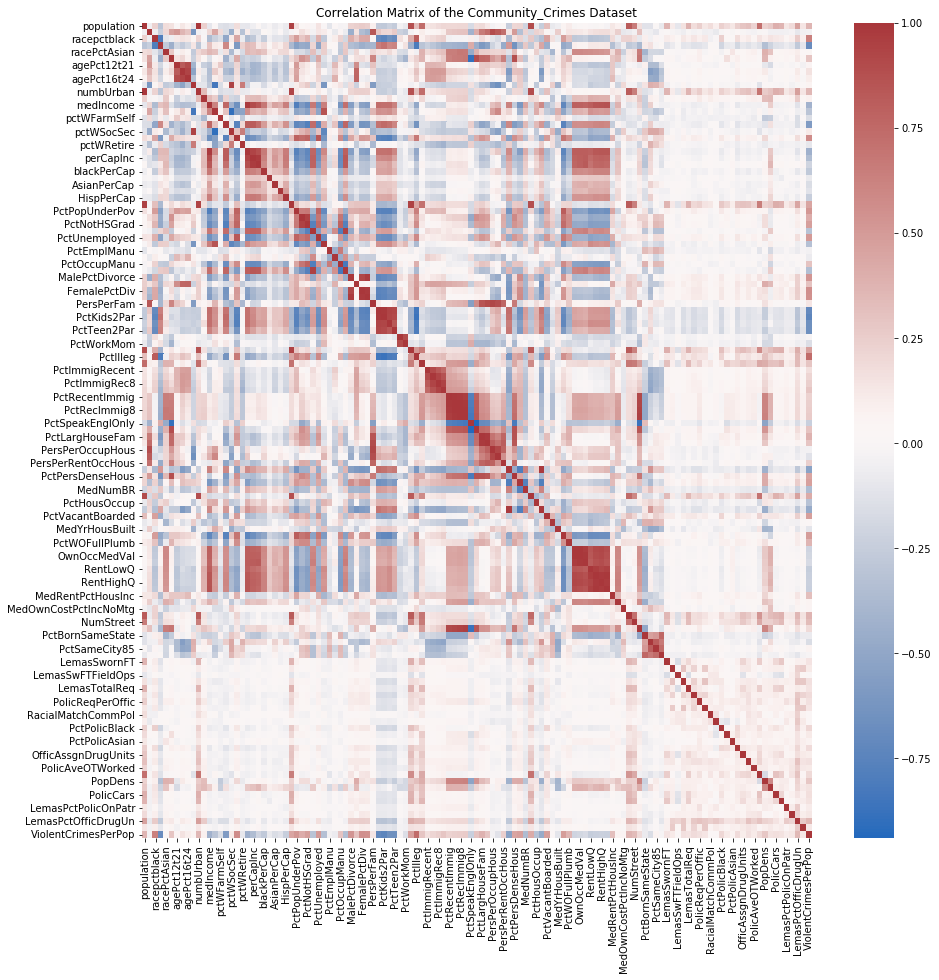

In [10]:
#cc_data_2 = cc_data.iloc[:,5:]
complete_cc_data =  pd.concat([trainset_cc,testset_cc])
plt.figure(figsize = (15, 15))
#sns.heatmap(cc_data_2.corr(), cmap = "vlag")
sns.heatmap(complete_cc_data.corr(), cmap = "vlag")
plt.title('Correlation Matrix of the Community_Crimes Dataset')
plt.show()

## (d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m, in which s is sample standard deviation and m is sample mean.

In [11]:
complete_cc_data_col_list = list()
cv_list = list()
for column_name, content in complete_cc_data.iteritems():
    complete_cc_data_col_list.append(column_name)
    cv = content.std()/content.mean()
    cv_list.append(cv)

cv_dataframe = pd.DataFrame({'feature':complete_cc_data_col_list, 'coef of vari':cv_list})
display(cv_dataframe)

,feature,coef of vari
0,population,2.203503
1,householdsize,0.353298
2,racepctblack,1.410920
3,racePctWhite,0.323782
4,racePctAsian,1.359162
...,...,...
118,LemasPctPolicOnPatr,0.329605
119,LemasGangUnitDeploy,1.512068
120,LemasPctOfficDrugUn,2.555266
121,PolicBudgPerPop,1.412459


## (e) Pick √128 features with highest CV , and make scatter plots and box plots for them. 

In [12]:
import math
num_of_features = int(math.sqrt(128))
cv_dataframe = cv_dataframe.sort_values(by='coef of vari', ascending=False)
cv_dataframe = cv_dataframe[:num_of_features]
display(cv_dataframe)

,feature,coef of vari
90,NumStreet,4.407702
108,PctPolicAsian,3.845721
89,NumInShelters,3.485481
96,LemasSwornFT,3.274876
49,NumIlleg,2.994196
51,NumImmig,2.900497
110,OfficAssgnDrugUnits,2.893110
117,PolicOperBudg,2.791598
100,LemasTotalReq,2.765483
120,LemasPctOfficDrugUn,2.555266


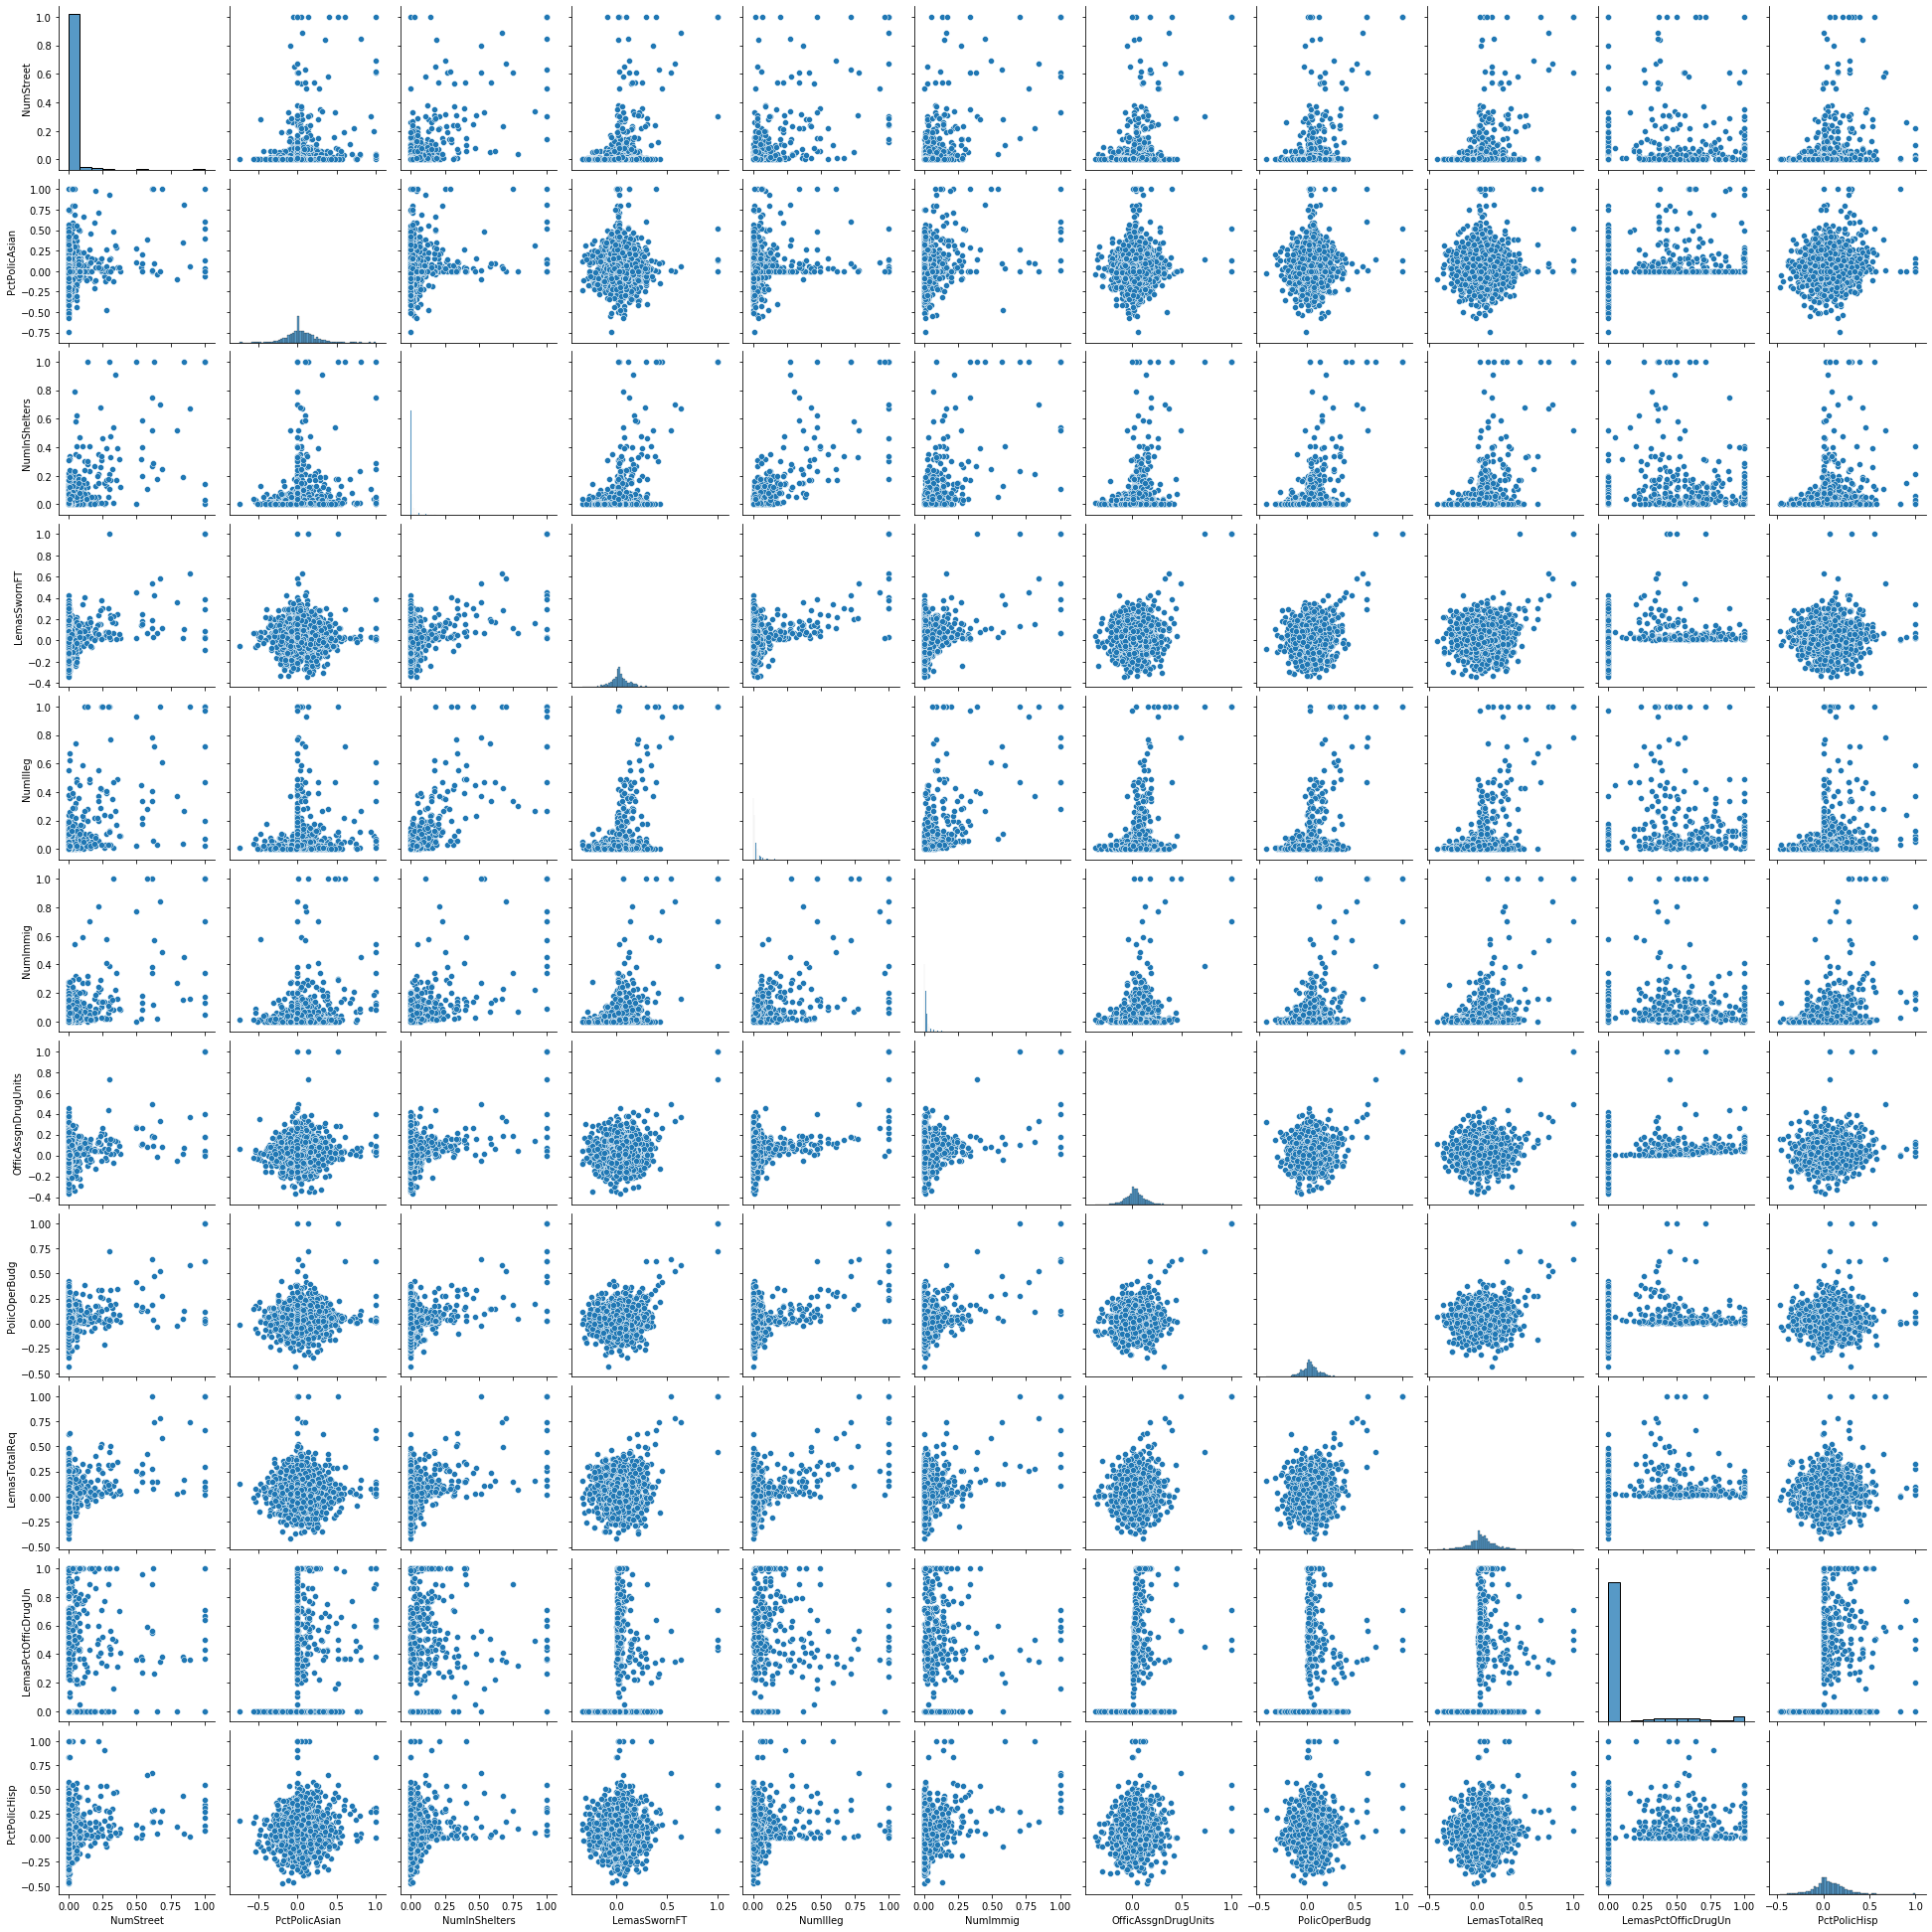

In [13]:
highest_cv_col_list = cv_dataframe['feature'].to_list()
sns.pairplot(complete_cc_data[highest_cv_col_list])
plt.show()

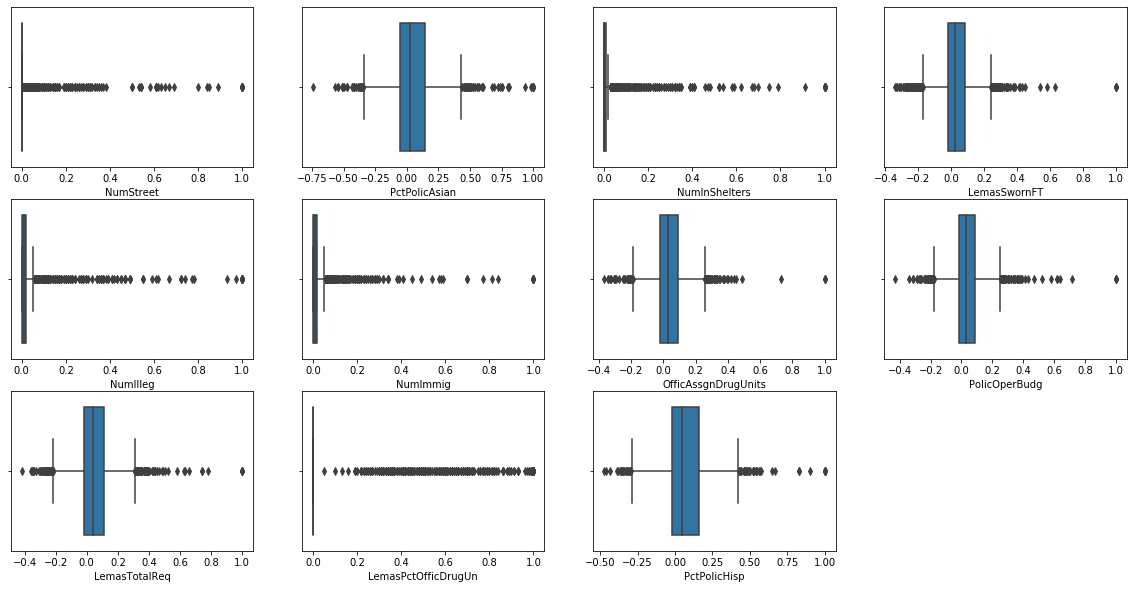

In [14]:
plt.figure(figsize = (20, 10))
count_plot = 1
for label, content in complete_cc_data[highest_cv_col_list].iteritems():
    plt.subplot(3,4,count_plot)
    sns.boxplot(x=complete_cc_data[label])
    #sns.stripplot(data=binary_train_extract, x=label, y = 'Label', hue='Label')
    count_plot += 1
plt.show()

## (f) Fit a linear model using least squares to the training set and report the test error.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

trainset_cc_X = trainset_cc.drop('ViolentCrimesPerPop', axis=1)
trainset_cc_y = trainset_cc['ViolentCrimesPerPop']

testset_cc_X = testset_cc.drop('ViolentCrimesPerPop', axis=1)
testset_cc_y = testset_cc['ViolentCrimesPerPop']

In [16]:
reg = LinearRegression().fit(trainset_cc_X,trainset_cc_y)
testset_cc_y_predict = reg.predict(testset_cc_X)
testset_cc_mse = mean_squared_error(testset_cc_y, testset_cc_y_predict)
print('The test error is:', testset_cc_mse)

The test error is: 0.01815771523041036


## (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error.


In [17]:
from sklearn.linear_model import RidgeCV

#alpha is lambda
#reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV
ridge_reg = RidgeCV(alphas = [1e-3,1e-2,1e-1,1,10,100,1000,10000,100000,1000000], cv = 5).fit(trainset_cc_X, trainset_cc_y)
chosen_lambda = ridge_reg.alpha_
testset_cc_y_predict = ridge_reg.predict(testset_cc_X)
testset_cc_mse = mean_squared_error(testset_cc_y, testset_cc_y_predict)
print('The chosen lambda is:', chosen_lambda)
print('The test error is:', testset_cc_mse)

The chosen lambda is: 1.0
The test error is: 0.017814032216656225


## (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.

In [18]:
from sklearn.linear_model import LassoCV
'''
non-standardized

'''
#reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV
lasso_reg = LassoCV(alphas = [1e-3,1e-2,1e-1,1,10,100,1000,10000,100000,1000000], cv = 5).fit(trainset_cc_X, trainset_cc_y)
chosen_lambda = lasso_reg.alpha_
testset_cc_y_predict = lasso_reg.predict(testset_cc_X)
testset_cc_mse = mean_squared_error(testset_cc_y, testset_cc_y_predict)
print('The chosen lambda is:', chosen_lambda)
print('The test error is:', testset_cc_mse)
#lasso_reg.coef_[lasso_reg.coef_!=0]
print('The list of variables are:', testset_cc_X.columns[lasso_reg.coef_!=0].to_list())

The chosen lambda is: 0.001
The test error is: 0.017596226227599914
The list of variables are: ['racepctblack', 'racePctWhite', 'agePct12t29', 'pctUrban', 'pctWPubAsst', 'AsianPerCap', 'MalePctDivorce', 'PctKids2Par', 'PctYoungKids2Par', 'PctWorkMom', 'PctIlleg', 'PctRecImmig10', 'PctPersDenseHous', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'NumStreet', 'PctForeignBorn', 'RacialMatchCommPol', 'PctPolicHisp', 'PctPolicAsian', 'PolicCars', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn']


In [19]:
'''
standardized

'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_trainset_cc_X = scaler.fit_transform(trainset_cc_X)
standardized_testset_cc_X = scaler.fit_transform(testset_cc_X)

standardized_trainset_cc_X = pd.DataFrame(standardized_trainset_cc_X, columns=trainset_cc_X.columns)
standardized_testset_cc_X = pd.DataFrame(standardized_testset_cc_X, columns=testset_cc_X.columns)

lasso_reg = LassoCV(alphas = [1e-3,1e-2,1e-1,1,10,100,1000,10000,100000,1000000], cv = 5).fit(standardized_trainset_cc_X, trainset_cc_y)
chosen_lambda = lasso_reg.alpha_
testset_cc_y_predict = lasso_reg.predict(standardized_testset_cc_X)
testset_cc_mse = mean_squared_error(testset_cc_y, testset_cc_y_predict)
print('The chosen lambda is:', chosen_lambda)
print('The test error is:', testset_cc_mse)
#lasso_reg.coef_[lasso_reg.coef_!=0]
print('The list of variables are:', standardized_testset_cc_X.columns[lasso_reg.coef_!=0].to_list())



The chosen lambda is: 0.001
The test error is: 0.017922084928831197
The list of variables are: ['population', 'racepctblack', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec5', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctWOFullPlumb', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctSameCity85', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', '

- Non-standardized data seems to get a lower test error, but the two test errors are very similar.

## (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error.

In [20]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
n_features = len(standardized_trainset_cc_X.columns)
M_components = [i for i in range(1,n_features+1)]
print(M_components)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122]


In [21]:
'''
Choose the best M

'''
#standardized_trainset_cc_X
#standardized_testset_cc_X 

all_M_mse_list = list()

for M in M_components:
    kf_mse_list = list()
    k = 5 #number of fold
    kf = KFold(n_splits=5, shuffle=True, random_state=42) #create a k-fold cross-validator
    #use standardized data with PCA
    for train_index, validation_index in kf.split(trainset_cc_X):
        X_train = trainset_cc_X.iloc[train_index]
        X_valid = trainset_cc_X.iloc[validation_index]
        y_train = trainset_cc_y.iloc[train_index]
        y_valid = trainset_cc_y.iloc[validation_index]
        #do PCA for each M
        pca = PCA(n_components=M).fit(X_train)
        #pca_train = PCA(n_components=M).fit_transform(X_train)
        #pca_valid = PCA(n_components=M).fit_transform(X_valid)
        pca_train = pca.transform(X_train)
        pca_valid = pca.transform(X_valid)
        
        reg = LinearRegression()
        reg.fit(pca_train,y_train)
        y_predict = reg.predict(pca_valid)
        pca_valid_mse = mean_squared_error(y_valid, y_predict)
        kf_mse_list.append(pca_valid_mse)
    
    #calculate mse of each M from cross-validation
    M_mse_from_kf = sum(kf_mse_list)/k
    #append calculated mse of M with M as a tuple to a list 
    all_M_mse_list.append((M,M_mse_from_kf))

#sort the list by mse value from small to large
#reference: https://www.kite.com/python/answers/how-to-sort-a-list-of-tuples-by-the-second-value-in-python
all_M_mse_list.sort(key=lambda x:x[1])

print('The chosen M is:', all_M_mse_list[0][0])
print('The corresponding test error is:', all_M_mse_list[0][1])

The chosen M is: 111
The corresponding test error is: 0.020013818701196843


## (j) Fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, I use L1-penalized regression at each node, resulting in a tree called L1 penalized gradient boosting tree. I use XGBoost to fit the model tree and determine α (the regularization term) using cross-validation.

In [28]:
#Reference: https://stackoverflow.com/questions/51164771/python-xgboost-kernel-died
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
#from xgboost import XGBRegressor
#from xgboost import DMatrix
from sklearn.model_selection import cross_val_score

In [40]:
#References:
#https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html
#https://xgboost.readthedocs.io/en/latest/python/python_api.html?highlight=dmatrix#xgboost.DMatrix
#https://machinelearningmastery.com/xgboost-for-regression/
#https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html
#xgb_trainset = xgb.DMatrix(trainset_cc_X, trainset_cc_y)
#xgb_testset = xgb.DMatrix(testset_cc_X)

alphas = [1e-3,1e-2,1e-1,1,10,100,1000,10000,100000,1000000] #create a list of alphas
xgb_scores_list = list() #store XGB scores

kf = KFold(n_splits=5, shuffle=True, random_state=42) #create a k-fold cross-validator

for alpha in alphas:
    #booster='gbtree', 
    xgb_reg = xgb.XGBRegressor(booster='gbtree', objective='reg:linear', reg_lambda = alpha)
    scores = cross_val_score(xgb_reg, trainset_cc_X, trainset_cc_y, cv=kf, scoring = 'neg_mean_squared_error', error_score = 'raise')
    mean_score = abs(scores.mean())
    xgb_scores_list.append((alpha,mean_score))

xgb_scores_list.sort(key=lambda x:x[1])

print('The chosen Alpha is:', xgb_scores_list[0][0])
print('The corresponding test error is:', xgb_scores_list[0][1])


The chosen Alpha is: 10
The corresponding test error is: 0.02031316981896957


In [42]:
'''
Apply the best alpha to the XGBoost model
'''
xgb_reg = xgb.XGBRegressor(objective='reg:linear', reg_lambda = 10).fit(trainset_cc_X, trainset_cc_y)
xgb_y_predict = xgb_reg.predict(testset_cc_X)
xgb_mse = mean_squared_error(testset_cc_y, xgb_y_predict)
print('The test error of XGBoost model is:', xgb_mse)

The test error of XGBoost model is: 0.016983346771249234
